In [21]:
import numpy as np
from matplotlib import pyplot as plt

In [22]:
# Generate eps_exponents and calculate eps_values
eps_exponents = np.random.uniform(-5, -1, 2000)
eps_values = 10 ** eps_exponents


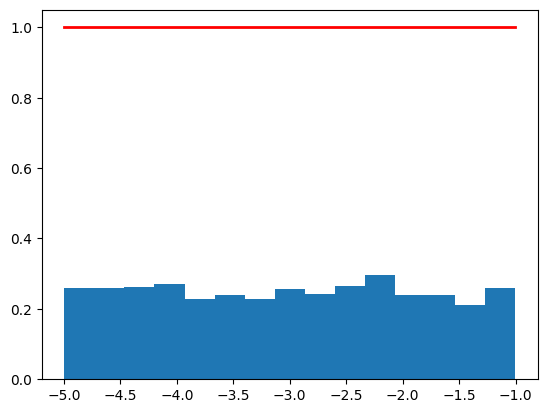

In [23]:
import matplotlib.pyplot as plt

count, bins, ignored = plt.hist(eps_exponents, 15, density=True)
plt.plot(bins, np.ones_like(bins), linewidth=2, color='r')
plt.show()

In [24]:
for value in eps_values:
    if 0.0212< value < 0.0213:
        print(value)

0.02126361129944298


In [25]:
import numpy as np

def generate_search_domains(data_size, feature_count):
    """
    Generates search domains for the OPTICS clustering algorithm hyperparameters.
    
    Parameters:
    - data_size: int, the total number of points in the dataset.
    - feature_count: int, the number of features in the dataset.
    
    Returns:
    - A dictionary with search domains for 'min_samples', 'xi', and 'min_cluster_size'.
    """
    
    # Define dynamic range for min_samples based on data size and feature count
    min_samples_start = 2
    min_samples_end = max(50, int(data_size * 0.05), feature_count * 2)  # Adjust this logic based on your dataset
    min_samples_domain = np.linspace(min_samples_start, min_samples_end, num=10, dtype=int).tolist()
    
    # Define xi search domain based on expert knowledge
    xi_domain = [0.001, 0.01, 0.02, 0.05, 0.1, 0.15, 0.2]
    
    # Define min_cluster_size search domain both as a fraction and absolute numbers
    min_cluster_size_fraction_domain = [0.01, 0.02, 0.05, 0.1, 0.15, 0.2]
    min_cluster_size_absolute_start = int(data_size * 0.01)  # 1% of data size
    min_cluster_size_absolute_end = max(50, int(data_size * 0.1))  # up to 10% of data size, adjust as necessary
    min_cluster_size_absolute_domain = np.linspace(min_cluster_size_absolute_start, min_cluster_size_absolute_end, num=10, dtype=int).tolist()
    
    # Combine fraction and absolute domains for min_cluster_size
    min_cluster_size_domain = min_cluster_size_fraction_domain + min_cluster_size_absolute_domain
    
    return {
        'min_samples': min_samples_domain,
        'xi': xi_domain,
        'min_cluster_size': min_cluster_size_domain
    }

# Example usage
data_size = 5000  # Adjust with your dataset size
feature_count = 2  # Adjust with the number of features in your dataset
search_domains = generate_search_domains(data_size, feature_count)
print(search_domains)


{'min_samples': [2, 29, 57, 84, 112, 139, 167, 194, 222, 250], 'xi': [0.001, 0.01, 0.02, 0.05, 0.1, 0.15, 0.2], 'min_cluster_size': [0.01, 0.02, 0.05, 0.1, 0.15, 0.2, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500]}


In [2]:
import numpy as np

def generate_expanded_search_domains(data_size, feature_count):
    """
    Generates expanded search domains for the OPTICS clustering algorithm hyperparameters.
    
    Parameters:
    - data_size: int, the total number of points in the dataset.
    - feature_count: int, the number of features in the dataset.
    
    Returns:
    - A dictionary with expanded search domains for 'min_samples', 'xi', and 'min_cluster_size'.
    """
    
    # Expand dynamic range for min_samples based on data size and feature count
    min_samples_start = 2
    # Increase the upper limit for min_samples significantly
    min_samples_end = max(100, int(data_size * 0.1), feature_count * 3)  # More aggressive adjustment
    min_samples_domain = np.linspace(min_samples_start, min_samples_end, num=20, dtype=int).tolist()  # Increase number of points
    
    # Expand xi search domain to cover a wider range of values
    xi_domain = [0.001, 0.005, 0.01, 0.02, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3]  # Adding more granularity and higher values
    
    # Expand min_cluster_size search domain, considering both fractions and absolute numbers
    # Allow for even smaller fractions and higher absolute numbers
    min_cluster_size_fraction_domain = [0.005, 0.01, 0.02, 0.05, 0.1, 0.15, 0.2, 0.25]
    min_cluster_size_absolute_start = int(data_size * 0.005)  # Allowing for smaller clusters
    min_cluster_size_absolute_end = max(100, int(data_size * 0.2))  # Allowing for larger clusters
    min_cluster_size_absolute_domain = np.linspace(min_cluster_size_absolute_start, min_cluster_size_absolute_end, num=20, dtype=int).tolist()  # Increase number of points
    
    # Combine fraction and absolute domains for min_cluster_size
    min_cluster_size_domain = sorted(set(min_cluster_size_fraction_domain + min_cluster_size_absolute_domain))  # Remove duplicates and sort
    
    return {
        'min_samples': min_samples_domain,
        'xi': xi_domain,
        'min_cluster_size': min_cluster_size_domain
    }

# Example usage
data_size = 5000  # Adjust with your dataset size
feature_count = 2  # Adjust with the number of features in your dataset
expanded_search_domains = generate_expanded_search_domains(data_size, feature_count)
print(expanded_search_domains)


{'min_samples': [2, 28, 54, 80, 106, 133, 159, 185, 211, 237, 264, 290, 316, 342, 368, 395, 421, 447, 473, 500], 'xi': [0.001, 0.005, 0.01, 0.02, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3], 'min_cluster_size': [0.005, 0.01, 0.02, 0.05, 0.1, 0.15, 0.2, 0.25, 25, 76, 127, 178, 230, 281, 332, 384, 435, 486, 538, 589, 640, 692, 743, 794, 846, 897, 948, 1000]}
